# 1. Dataset introduction

The dataset, called "Students Performance in Exams", is downloaded from Kaggle. It contains demographic information and academic performance of 1000 high school students in the United States. The variables include gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, and writing score.

This dataset is particularly of my interest because it not only contains the potential factors which can affect students' academic performance, but also covers the scores in different subjects (Maths, Reading, and Writing). It allows me to analyze the students' academic performance from different background, assess the effects of different factors on academic performance, and observe the association of performance among different subjects.

# 2. Questions interested
1. What are the relationships of students performance in Maths, Reading, and Writing?
2. What are the factors affecting students' academic performance? What's the effect?

# 3. Data Overview

In [136]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
#Load dataset
df = pd.read_csv('./Assignment1/StudentsPerformance.csv')

In [138]:
#Check the shape of the dataset
print("The dataset has", df.shape[0], "rows and", df.shape[1], "columns.")

The dataset has 1000 rows and 8 columns.


In [139]:
#Check the first five records of the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [140]:
#Check the data type in each column
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [141]:
#Check if there is any missing value
missing = df.isnull().sum()
print("The count of missing value is", missing.sum())

The count of missing value is 0


In [142]:
#Check the summary of numerical variables
print("Summary of scores")
print(df.describe())

Summary of scores
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


There is no missing values in the dataset. <br>
I don't see any clearly erroneous value of numerical variables. The mean of math, reading, and writing scores are similar, with Math having the lowest mean. The max scores are all 100, not exceeding the maximum of test scores. 

In [144]:
#Check the categorical variables
print(df.describe(include = ['O']))
print("------------------------------------------------")
print(df['gender'].value_counts())
print("------------------------------------------------")
print(df['race/ethnicity'].value_counts())
print("------------------------------------------------")
print(df['parental level of education'].value_counts())
print("------------------------------------------------")
print(df['lunch'].value_counts())
print("------------------------------------------------")
print(df['test preparation course'].value_counts())

        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   

       test preparation course  
count                     1000  
unique                       2  
top                       none  
freq                       642  
------------------------------------------------
female    518
male      482
Name: gender, dtype: int64
------------------------------------------------
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
------------------------------------------------
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: paren

From the summary above, I don't see any unreasonable value of categorical variables. The number of female and male students in this dataset are roughly the same. Race Group C are the most in the datasets. The sample size of the students with parents of Master's degree is the smallest among all education categories. The students who have standard lunch represent 2/3 of the dataset. The students without test preparation course also represent 2/3 of the dataset.

# 4. Data Exploration and Visualization

## 4.1 Association of scores among subjects

Correlation of scores


<function matplotlib.pyplot.show(*args, **kw)>

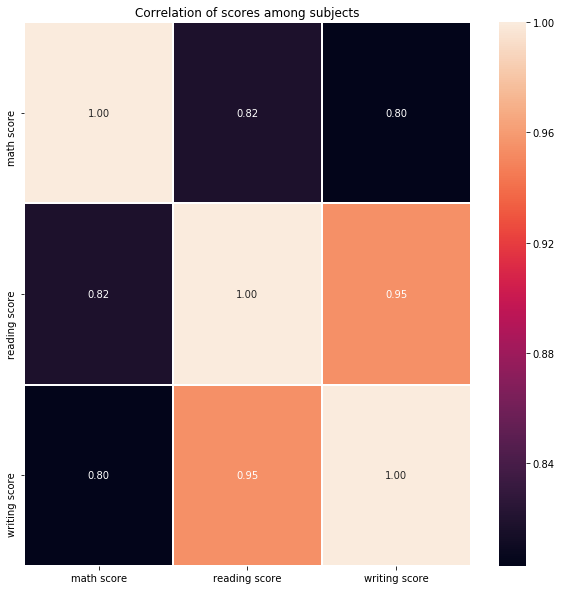

In [145]:
#Explore the relationship among scores of different subjects.

#Check the correlation among the scores
print("Correlation of scores")
correlation = df.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=1, linecolor="white",annot=True,fmt=".2f")
plt.title("Correlation of scores among subjects")
plt.show

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<function matplotlib.pyplot.show(*args, **kw)>

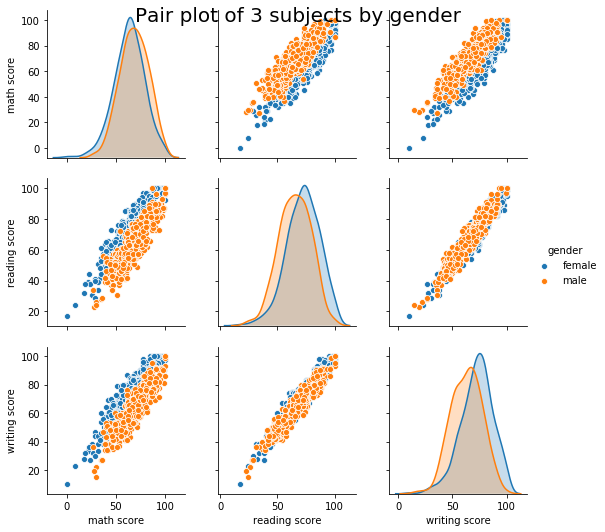

In [146]:
sns.pairplot(df, hue="gender")
plt.suptitle("Pair plot of 3 subjects by gender", fontsize=20)
plt.show

From the correlation matrix, we can see the correlation among three subjects are positive with the highest correlation between Reading and Writing. <br> <br>
From the pair plot, we also can tell the same correlations. There are some differences between female and male students in terms of the scores. I will explore it next.

## 4.2 Gender and Academic Performance

Text(0.5,1,'Writing score and Gender')

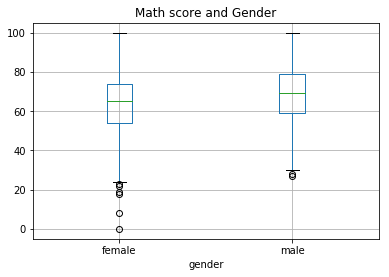

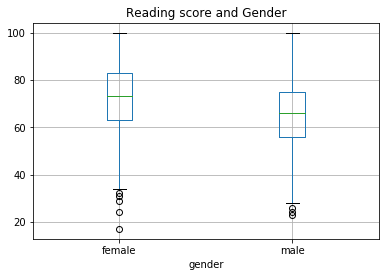

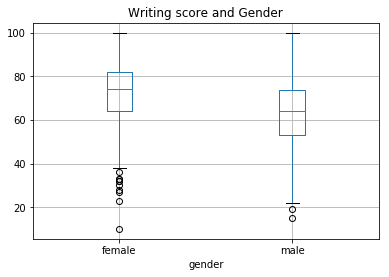

In [80]:
df.boxplot(column="math score",by="gender")
plt.suptitle("")
plt.title("Math score and Gender")
df.boxplot(column="reading score",by="gender")
plt.suptitle("")
plt.title("Reading score and Gender")
df.boxplot(column="writing score",by="gender")
plt.suptitle("")
plt.title("Writing score and Gender")

From the box plots above, we can tell in general, male students perform slightly better in Maths, whereas female students perform better in Reading and Writing. Compared to male students, female students have more outliers with lowest scores in Writing, Reading, and Maths.

## 4.3 Race/enthicity and Academic Performance

Text(0.5,1,'Writing score and race/enthicity')

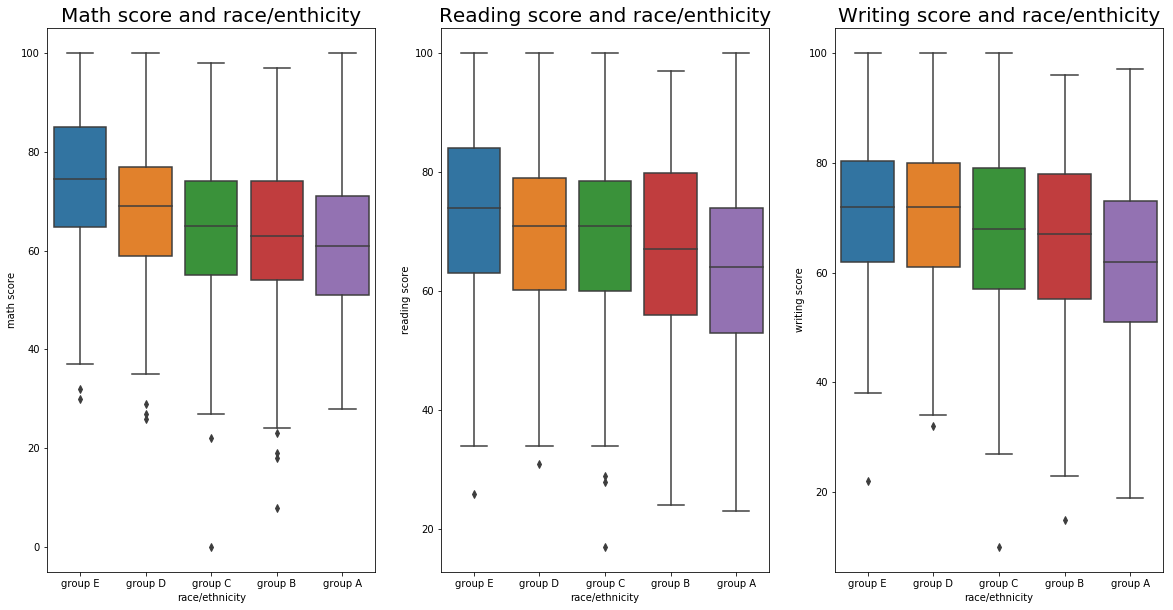

In [148]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(131)
order = df.groupby(by=["race/ethnicity"])["math score"].median().iloc[::-1].index
sns.boxplot(data = df, x = "race/ethnicity", y = "math score",order = order)
plt.title("Math score and race/enthicity", fontsize = 20)
ax2 = fig.add_subplot(132)
order = df.groupby(by=["race/ethnicity"])["reading score"].median().iloc[::-1].index
sns.boxplot(data = df, x = "race/ethnicity", y = "reading score",order = order)
plt.title("Reading score and race/enthicity", fontsize = 20)
ax2 = fig.add_subplot(133)
order = df.groupby(by=["race/ethnicity"])["writing score"].median().iloc[::-1].index
sns.boxplot(data = df, x = "race/ethnicity", y = "writing score",order = order)
plt.title("Writing score and race/enthicity", fontsize = 20)

From the box plots above, we can see Race Group E got the highest Reading, Writing and Maths scores among 5 race groups, whereas Group A has the lowest scores in all 3 subjects. As the rank of the groups is the same for all 3 subjects, race may affect the academic performance in general.

## 4.4 Test Preparation Course and Academic Performance

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Writing scores')

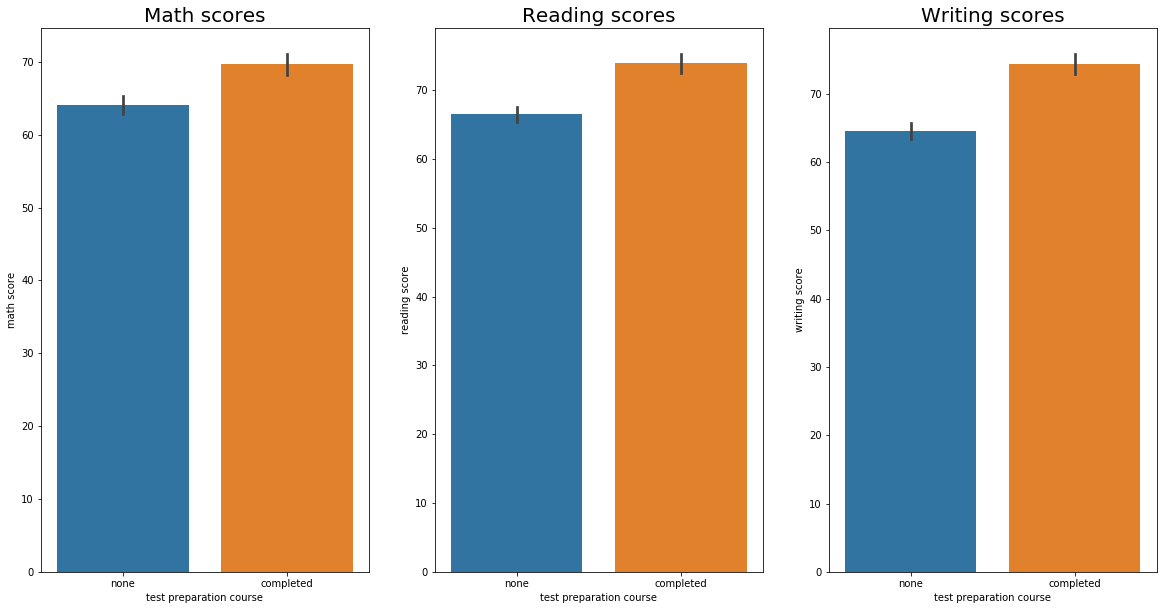

In [149]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(131)
sns.barplot(data = df, x='test preparation course',y='math score',ax=ax1)
plt.title("Math scores",fontsize = 20)
ax2 = fig.add_subplot(132)
sns.barplot(data = df, x='test preparation course',y='reading score',ax=ax2)
plt.title("Reading scores", fontsize = 20)
ax3 = fig.add_subplot(133)
sns.barplot(data = df, x='test preparation course',y='writing score',ax=ax3)
plt.title("Writing scores", fontsize = 20)


From the barplot above, we can see that completing test preparation course can help students achieve higher scores in all three subjects, with the biggest improvement in Writing.

## 4.5 Parental Level of Education and Academic Performance

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

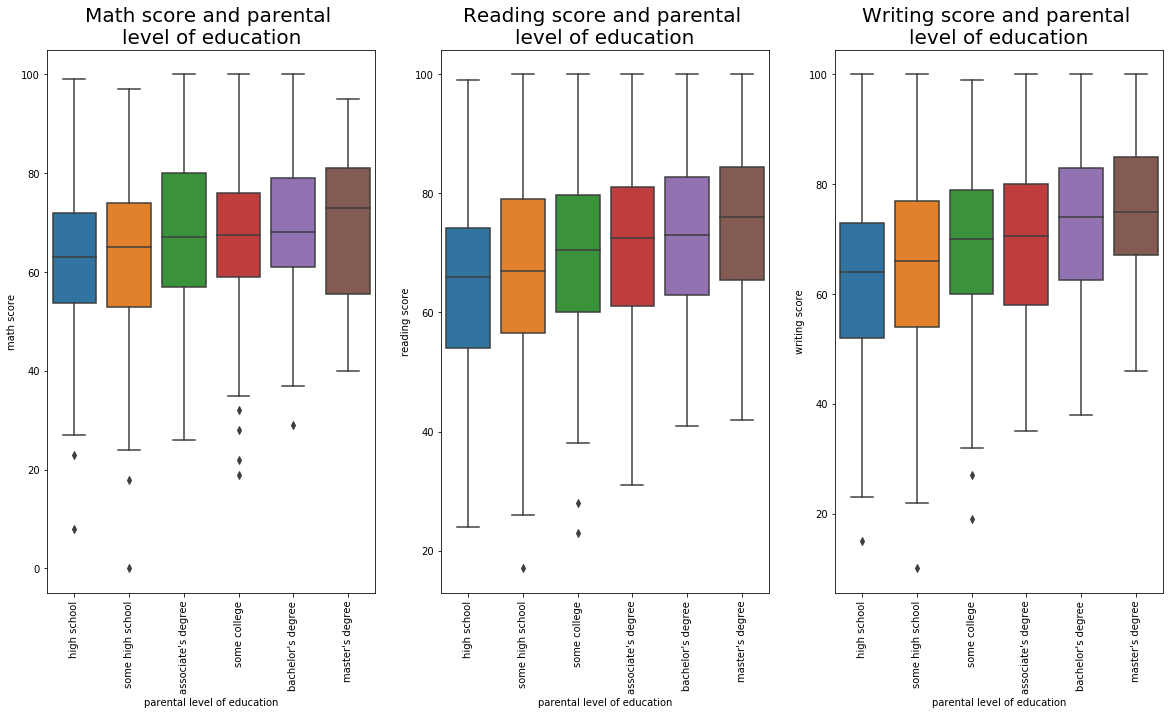

In [131]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(131)
order = df.groupby(by=["parental level of education"])["math score"].median().sort_values().index.values
sns.boxplot(data = df, x = "parental level of education", y = "math score",order = order)
plt.title("Math score and parental \nlevel of education", fontsize = 20)
plt.xticks(rotation=90)
ax2 = fig.add_subplot(132)
order = df.groupby(by=["parental level of education"])["reading score"].median().sort_values().index.values
sns.boxplot(data = df, x = "parental level of education", y = "reading score",order = order)
plt.title("Reading score and parental \nlevel of education", fontsize = 20)
plt.xticks(rotation=90)
ax2 = fig.add_subplot(133)
order = df.groupby(by=["parental level of education"])["writing score"].median().sort_values().index.values
sns.boxplot(data = df, x = "parental level of education", y = "writing score",order = order)
plt.title("Writing score and parental \nlevel of education", fontsize = 20)
plt.xticks(rotation=90)

In general, the higher level education parents have, the higher scores students will achieve.

## 4.6 Lunch Type and Academic Performance

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Writing scores')

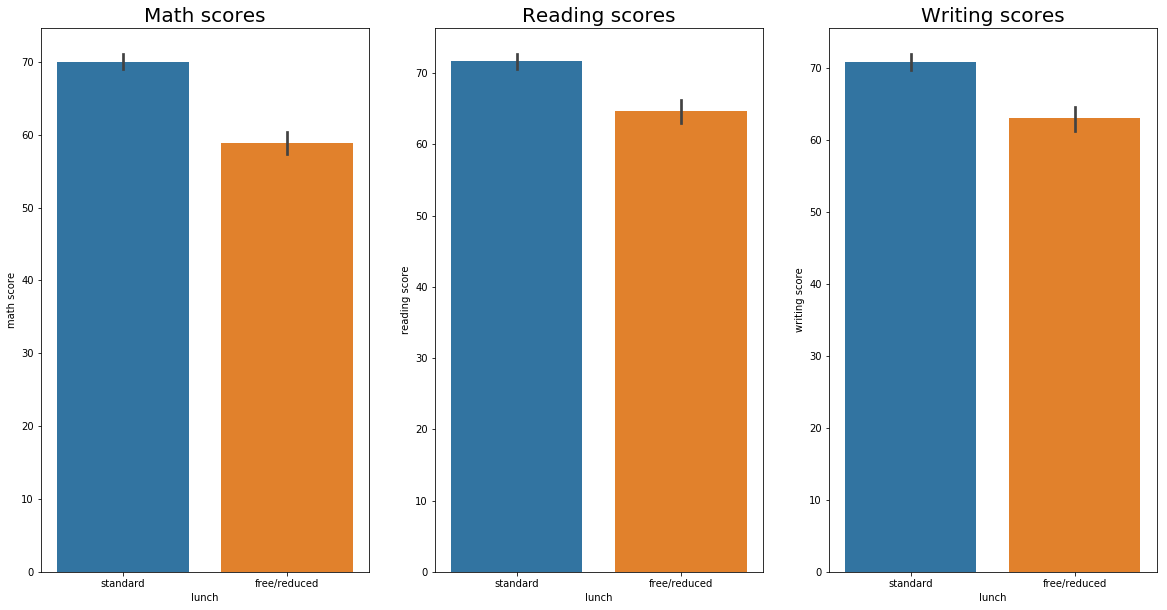

In [130]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(131)
sns.barplot(data = df, x='lunch',y='math score',ax=ax1)
plt.title("Math scores",fontsize = 20)
ax2 = fig.add_subplot(132)
sns.barplot(data = df, x='lunch',y='reading score',ax=ax2)
plt.title("Reading scores", fontsize = 20)
ax3 = fig.add_subplot(133)
sns.barplot(data = df, x='lunch',y='writing score',ax=ax3)
plt.title("Writing scores", fontsize = 20)

Students who have standard lunch generally perform better than those with free/reduced lunch in all 3 subjects.

# 5. Insights
Based on the graphs above, we can get the following insights:

1. Reading and Writing have the highest positive correlation. It makes sense because normally, the students who are good at reading can also write well and vice versa. Both Reading and Writing belong to Art and require similar skillsets. In contrast, Maths, belonging to Science, require different skillsets from Reading and Writing, so it's understandable that the correlations between Maths and the other two subjects are lower. 
<br>

2. Interestingly, male students perform slightly better than female students in Maths, but female students do better in Reading and Writing. It suggests that high schools can organize some "learn-from-each-other" programs between male and female students so that they can help each other with their own strength.
<br>

3. Race Group A students have the most struggles with all 3 subjects because their scores are the lowest among 5 Race/Ethnicity groups. Schools should focus more on Group A students in terms of academic improvement and give them more support.
<br>

4. Test preparation course does help students to improve their scores. Teachers can encourage students who have difficulties with their studies to join the course.
<br>

5. As expected, students' scores increase as the parents' education levels increase. Maybe the students whose parents are not highly educated have trouble to seek for academic help at home. If it's the case, schools should offer more academic help to these students at school.
<br>

6. If students are from lower-income families, they will probably get lunch free or at a reduced price. As we can see from the last graph above, students who have standard lunch generally perform better than those with free/reduced lunch. It also implies the students from lower-income families might also encounter more challenges on academic studies. It will be good if schools can help them not only financially but also academically. 
